# Ukrainian Brown Corpus Analysis

## (folder good)

In [1]:
import xml.etree.cElementTree as et
import pandas as pd 
import numpy as np 
import os, collections
import glob
import re
from IPython.display import display, HTML
from plotly.offline import init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt

In [2]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

pd.set_option('display.max_colwidth', -1)

In [4]:
CATS = "ABCDEFGHI"
FRACTIONS = {"A": 25, "B": 3, "C": 7, "D": 7, "E": 3, "F": 5, "G": 10, "H": 15, "I": 25}
DESCRIPTIONS = {"A": "Преса", "B": "Релігійна література", "C": "Професійно-популярна література", 
                "D": "«Естетичні інформативні» тексти", "E": "Адміністративні документи", 
                "F": "Науково-популярна література", "G": "Наукова література", 
                "H": "Навчальна література", "I": "Художні тексти"}
PATH_IN = "brown-uk/corpus/data/good/*.txt"
PATH_OUT = "aux/"
CATEGORIES_data = [["A", "Преса","25%","Репортажі, огляди, редакційні статті, листи до редакції; національні й регіональні видання; тематично - політика, спорт, суспільство, економіка й фінанси, короткі новини, культура - театр, література, музика, танці"],
              ["B", "Релігійна література", "3%", "Книжки, періодика, брошури"],
              ["C", "Професійно-популярна література","7%","Книжки й періодика; домоводство, ремесла, «сад і город», хобі, ремонт і будівництво, конструювання, музика й танці, домашні тварини, спорт, їжа й вино, подорожі, фермерство, робочі професії тощо"],
              ["D", "«Естетичні інформативні» тексти","7%","Інформативні тексти, що не потрапляють в інші категорії, зокрема, біографії, мемуари, есеї, передмови, особисті листи, художня й мистецтвознавча критика, рекламні тексти"],
              ["E", "Адміністративні документи","3%","Закони, урядові акти, звіти організацій/фондів/компаній, офіційні листи"],
              ["F", "Науково-популярна література","5%"],
              ["G", "Наукова література","10%","Книжки й періодика; природничі й гуманітарні науки, техніка й інженерна справа"],
              ["H", "Навчальна література","15%","Підручники, посібники, гуманітарні та природничі науки тощо"],
              ["I", "Художні тексти","25%","Романи, повісті, оповідання, новели, за тематикою – загальна, детективи, фантастика, пригодницька, любовна, гумористична тощо"]]
CATEGORIES = pd.DataFrame(CATEGORIES_data, columns = ['id', 'Category','Fraction', 'Description'])

In [5]:
#brown-uk/corpus/data/good/D_Molchanovskyi_Peredmova_do_ukrainskoho_vydannia_2016(4).txt
#print(df.loc[df['length'] == 2195]['filename'])

In [6]:
#for f in glob.iglob(PATH_IN ): # generator, search immediate subdirectories 
#    print (f)

In [7]:
def read_xml(xmlFileName):
    with open(xmlFileName, 'r') as xml_file:
        xml = xml_file.read()
        tree = et.fromstring(r"<?xml version='1.0' encoding='utf-8'?><root>"+re.sub(r"<foreign>.*?</foreign>", r'_FOREIGN_', 
                                                xml.replace('<i>','').
                                                replace('</i>','').
                                                replace('<b>','').
                                                replace('</b>','').
                                                replace('<url>','').
                                                replace('</url>','').
                                                replace('<emphasis>','').
                                                replace('</emphasis>','').
                                                replace('<quote>','_QUOTE_ ').
                                                replace('</quote>',' _QUOTE_').
                                                replace('<picture>','_PICTURE_ ').
                                                replace('<chart>','_CHART_ ').
                                                replace('<formula>','_FORMULA_ ').
                                                replace('<...>','').
                                                replace('&','&#38;'))+"</root>")
        temp_dict = {}   
        
        temp_dict["filename"]=xmlFileName

        # iterate through all the fields
        for var in tree:
            temp_dict[var.tag] = var.text
            #print(var.attrib)

        # generate the dict
        return temp_dict

In [8]:
df = pd.DataFrame()
#i=0
for name in glob.iglob(PATH_IN):
    #i+=1
    #print(i)
    #print(name)
    if name[26] in CATS and name[27] == "_":
        df=df.append(read_xml(name),ignore_index=True )
df=df.replace('NaN','')
df=df.replace('None','')
df['length']=df['length'].astype(int)
df['year']=df['year'].apply(lambda x: int(x) if x is not None else None)

In [9]:
df.columns

Index(['alt_orth', 'author_name_1', 'author_name_2', 'author_name_3',
       'author_surname_1', 'author_surname_2', 'author_surname_3', 'body',
       'comments', 'errors', 'filename', 'id', 'length', 'pages', 'publ_in',
       'publ_part', 'publ_place', 'publisher', 'title', 'year', 'author_name',
       'author_surname', 'author_name_4', 'author_name_5', 'author_name_6',
       'author_name_7', 'author_surname_4', 'author_surname_5',
       'author_surname_6', 'author_surname_7'],
      dtype='object')

In [10]:
display(HTML("<p style='font-weight: bold; color:black; font-size:140%; font-family:verdana;text-align:center;'> "+
             "Years of text publication</p>"))
display(HTML("<p style='font-weight: bold; color:black; font-size:110%; font-family:verdana;text-align:center;'> "+
             str(int(df['year'].min()))+" - "+ str(int(df['year'].max()))+"</p>"))

In [28]:
display(HTML("<p style='font-weight: bold; color:black; font-size:150%; font-family:verdana;text-align:center;'> "+
             "Length of text. (Number of words)</p>"))
display(HTML("<p style='font-weight: bold; color:black; font-size:110%; font-family:verdana;text-align:center;'> "+
             str(int(df['length'].min()))+" - "+ str(int(df['length'].max()))+" words </p>"))

In [12]:
grouped=df[['id', 'length']].groupby(['id']).sum()
grouped['RealFraction']=grouped['length']/grouped['length'].sum()
CATEGORIES_df= pd.merge(CATEGORIES, grouped, on='id')

In [13]:
for category in CATEGORIES_df['id']:
    f= open("brown-uk/corpus/all_"+category+".txt","w+")
    for i, entry in df.iterrows():
        #print(entry)
        if (entry['id']==category):
            f.write(entry['body'].replace('<quote>','_QUOTE_ ').
                    replace(' _QUOTE_','').
                    replace('_PICTURE_ ','').
                    replace('_CHART_ ','').
                    replace('_FORMULA_ ',''))
    f.close()

In [14]:
f= open("brown-uk/corpus/all.txt","w+")
for i, entry in df.iterrows():
    f.write(entry['body'].replace('<quote>','_QUOTE_ ').
                    replace(' _QUOTE_','').
                    replace('_PICTURE_ ','').
                    replace('_CHART_ ','').
                    replace('_FORMULA_ ',''))
f.close()

In [15]:
data = pd.read_csv('results/tagtext.lemma.freq.txt', sep="\t", header = None)
lemmas=pd.DataFrame()

data.columns=['Freq', 'Lemma']
data_A = pd.read_csv('results/tagtext_A.lemma.freq.txt', sep="\t", header = None)
data_A.columns=['Freq_A', 'Lemma']
num_sentences_A=len(pd.read_csv('results/tagtext_A.txt', sep="\n", header = None))
lemmas=lemmas.append({'id':'A', 'UniqueLemmas':len(data_A), 'NumSentences':num_sentences_A},ignore_index=True)

data_B = pd.read_csv('results/tagtext_B.lemma.freq.txt', sep="\t", header = None)
data_B.columns=['Freq_B', 'Lemma']
num_sentences_B=len(pd.read_csv('results/tagtext_B.txt', sep="\n", header = None))
lemmas=lemmas.append({'id':'B', 'UniqueLemmas':len(data_B), 'NumSentences':num_sentences_B},ignore_index=True)

data_C = pd.read_csv('results/tagtext_C.lemma.freq.txt', sep="\t", header = None)
data_C.columns=['Freq_C', 'Lemma']
num_sentences_C=len(pd.read_csv('results/tagtext_C.txt', sep="\n", header = None))
lemmas=lemmas.append({'id':'C', 'UniqueLemmas':len(data_C), 'NumSentences':num_sentences_C},ignore_index=True)

data_D = pd.read_csv('results/tagtext_D.lemma.freq.txt', sep="\t", header = None)
data_D.columns=['Freq_D', 'Lemma']
num_sentences_D=len(pd.read_csv('results/tagtext_D.txt', sep="\n", header = None))
lemmas=lemmas.append({'id':'D', 'UniqueLemmas':len(data_D), 'NumSentences':num_sentences_D},ignore_index=True)

data_E = pd.read_csv('results/tagtext_E.lemma.freq.txt', sep="\t", header = None)
data_E.columns=['Freq_E', 'Lemma']
num_sentences_E=len(pd.read_csv('results/tagtext_E.txt', sep="\n", header = None))
lemmas=lemmas.append({'id':'E', 'UniqueLemmas':len(data_E), 'NumSentences':num_sentences_E},ignore_index=True)

data_F = pd.read_csv('results/tagtext_F.lemma.freq.txt', sep="\t", header = None)
data_F.columns=['Freq_F', 'Lemma']
num_sentences_F=len(pd.read_csv('results/tagtext_F.txt', sep="\n", header = None))
lemmas=lemmas.append({'id':'F', 'UniqueLemmas':len(data_F), 'NumSentences':num_sentences_F},ignore_index=True)

data_G = pd.read_csv('results/tagtext_G.lemma.freq.txt', sep="\t", header = None)
data_G.columns=['Freq_G', 'Lemma']
num_sentences_G=len(pd.read_csv('results/tagtext_G.txt', sep="\n", header = None))
lemmas=lemmas.append({'id':'G', 'UniqueLemmas':len(data_G), 'NumSentences':num_sentences_G},ignore_index=True)

data_H = pd.read_csv('results/tagtext_H.lemma.freq.txt', sep="\t", header = None)
data_H.columns=['Freq_H', 'Lemma']
num_sentences_H=len(pd.read_csv('results/tagtext_H.txt', sep="\n", header = None))
lemmas=lemmas.append({'id':'H', 'UniqueLemmas':len(data_H), 'NumSentences':num_sentences_H},ignore_index=True)

data_I = pd.read_csv('results/tagtext_I.lemma.freq.txt', sep="\t", header = None)
data_I.columns=['Freq_I', 'Lemma']
num_sentences_I=len(pd.read_csv('results/tagtext_I.txt', sep="\n", header = None))
lemmas=lemmas.append({'id':'I', 'UniqueLemmas':len(data_I), 'NumSentences':num_sentences_I},ignore_index=True)

CATEGORIES_df= pd.merge(CATEGORIES_df, lemmas, on='id')

In [16]:
display(HTML("<p style='font-weight: bold; color:black; font-size:150%; font-family:verdana;text-align:center;'> "+
             "Statistic by category</p>"))
CATEGORIES_df


,id,Category,Fraction,Description,length,RealFraction,NumSentences,UniqueLemmas
0,A,Преса,25%,"Репортажі, огляди, редакційні статті, листи до редакції; національні й регіональні видання; тематично - політика, спорт, суспільство, економіка й фінанси, короткі новини, культура - театр, література, музика, танці",128008,0.247901,8321.0,17148.0
1,B,Релігійна література,3%,"Книжки, періодика, брошури",14246,0.027589,884.0,3732.0
2,C,Професійно-популярна література,7%,"Книжки й періодика; домоводство, ремесла, «сад і город», хобі, ремонт і будівництво, конструювання, музика й танці, домашні тварини, спорт, їжа й вино, подорожі, фермерство, робочі професії тощо",29992,0.058083,2230.0,7026.0
3,D,«Естетичні інформативні» тексти,7%,"Інформативні тексти, що не потрапляють в інші категорії, зокрема, біографії, мемуари, есеї, передмови, особисті листи, художня й мистецтвознавча критика, рекламні тексти",36261,0.070223,2171.0,9068.0
4,E,Адміністративні документи,3%,"Закони, урядові акти, звіти організацій/фондів/компаній, офіційні листи",6172,0.011953,251.0,1328.0
5,F,Науково-популярна література,5%,None,26171,0.050683,1798.0,6581.0
6,G,Наукова література,10%,"Книжки й періодика; природничі й гуманітарні науки, техніка й інженерна справа",60457,0.117081,2794.0,8686.0
7,H,Навчальна література,15%,"Підручники, посібники, гуманітарні та природничі науки тощо",79797,0.154535,4811.0,10937.0
8,I,Художні тексти,25%,"Романи, повісті, оповідання, новели, за тематикою – загальна, детективи, фантастика, пригодницька, любовна, гумористична тощо",135264,0.261953,11268.0,18795.0


In [17]:
data= pd.merge(data, data_A, on='Lemma', how='left')
data= pd.merge(data, data_B, on='Lemma', how='left')
data= pd.merge(data, data_C, on='Lemma', how='left')
data= pd.merge(data, data_D, on='Lemma', how='left')
data= pd.merge(data, data_E, on='Lemma', how='left')
data= pd.merge(data, data_F, on='Lemma', how='left')
data= pd.merge(data, data_G, on='Lemma', how='left')
data= pd.merge(data, data_H, on='Lemma', how='left')
data= pd.merge(data, data_I, on='Lemma', how='left')
data.fillna(0, inplace=True)

In [29]:
display(HTML("<p style='font-weight: bold; color:black; font-size:150%; font-family:verdana;text-align:center;'> "+
             "Length of all text (Number of words)</p>"))
display(HTML("<p style='font-weight: bold; color:black; font-size:110%; font-family:verdana;text-align:center;'> "+
             str(df['length'].sum())+" words </p>"))

In [19]:
display(HTML("<p style='font-weight: bold; color:black; font-size:150%; font-family:verdana;text-align:center;'> "+
             "Number of unique lemmas</p>"))
display(HTML("<p style='font-weight: bold; color:black; font-size:110%; font-family:verdana;text-align:center;'> "+
             str(len(data))+" lemmas </p>"))

In [20]:
display(HTML("<p style='font-weight: bold; color:black; font-size:150%; font-family:verdana;text-align:center;'> "+
             "Top used lemmas for category A</p>"))

data.sort_values(by=['Freq_A'],ascending=False).head(10)

,Freq,Lemma,Freq_A,Freq_B,Freq_C,Freq_D,Freq_E,Freq_F,Freq_G,Freq_H,Freq_I
15636,32346,його,6912.0,1422.0,1368.0,2574.0,234.0,1602.0,2268.0,4716.0,11250.0
38179,22072,і,4698.0,906.0,1168.0,1960.0,122.0,992.0,1986.0,2936.0,7304.0
37863,17827,що,4258.0,536.0,600.0,1374.0,138.0,809.0,1785.0,2120.0,6207.0
38676,25254,її,3978.0,720.0,1116.0,1620.0,198.0,1116.0,2070.0,3096.0,11340.0
5960,13914,бути,3165.0,636.0,860.0,995.0,93.0,669.0,2185.0,2915.0,2396.0
36835,10795,цей,3020.0,344.0,681.0,869.0,96.0,650.0,1136.0,1372.0,2627.0
34204,10936,та,2728.0,240.0,698.0,472.0,222.0,520.0,2210.0,2036.0,1810.0
34725,10184,той,2519.0,388.0,543.0,975.0,37.0,526.0,840.0,1171.0,3185.0
19840,9152,на,2511.0,187.0,538.0,566.0,121.0,444.0,935.0,1180.0,2670.0
38013,8577,який,2281.0,326.0,431.0,574.0,86.0,389.0,1142.0,1706.0,1642.0


In [21]:
display(HTML("<p style='font-weight: bold; color:black; font-size:150%; font-family:verdana;text-align:center;'> "+
             "Top used lemmas for category B</p>"))

data.sort_values(by=['Freq_B'],ascending=False).head(10)

,Freq,Lemma,Freq_A,Freq_B,Freq_C,Freq_D,Freq_E,Freq_F,Freq_G,Freq_H,Freq_I
15636,32346,його,6912.0,1422.0,1368.0,2574.0,234.0,1602.0,2268.0,4716.0,11250.0
38179,22072,і,4698.0,906.0,1168.0,1960.0,122.0,992.0,1986.0,2936.0,7304.0
38676,25254,її,3978.0,720.0,1116.0,1620.0,198.0,1116.0,2070.0,3096.0,11340.0
5960,13914,бути,3165.0,636.0,860.0,995.0,93.0,669.0,2185.0,2915.0,2396.0
37863,17827,що,4258.0,536.0,600.0,1374.0,138.0,809.0,1785.0,2120.0,6207.0
34725,10184,той,2519.0,388.0,543.0,975.0,37.0,526.0,840.0,1171.0,3185.0
36835,10795,цей,3020.0,344.0,681.0,869.0,96.0,650.0,1136.0,1372.0,2627.0
38013,8577,який,2281.0,326.0,431.0,574.0,86.0,389.0,1142.0,1706.0,1642.0
12686,3185,життя,618.0,297.0,110.0,414.0,6.0,173.0,211.0,518.0,838.0
38006,8542,як,1827.0,270.0,318.0,798.0,42.0,438.0,996.0,1017.0,2836.0


In [22]:
display(HTML("<p style='font-weight: bold; color:black; font-size:150%; font-family:verdana;text-align:center;'> "+
             "=> Top used lemmas for categories are almost the same. But of course distrbution differs</p>"))

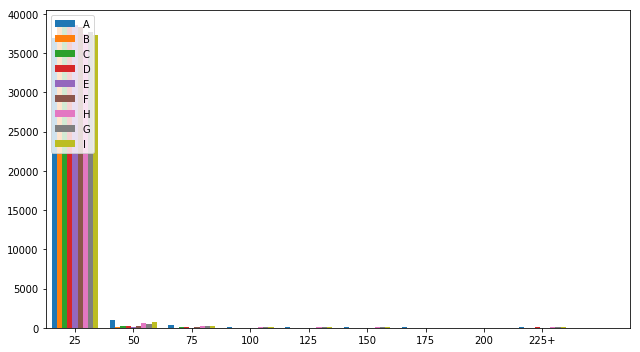

In [23]:
display(HTML("<p style='font-weight: bold; color:black; font-size:200%; font-family:verdana;text-align:center;'> " + 
             "<b>Distribution lem frequences</b>" + 
             "</p>"))
def plot_histogram_01():
    np.random.seed(1)
    values_A = data['Freq_A']
    values_B = data['Freq_B']
    values_C = data['Freq_C']
    values_D = data['Freq_D']
    values_E = data['Freq_E']
    values_F = data['Freq_F']
    values_H = data['Freq_H']
    values_G = data['Freq_G']
    values_I = data['Freq_I']

    bins = np.arange(0,250,25)

    fig, ax = plt.subplots(figsize=(9, 5))
    _, bins, patches = plt.hist([np.clip(values_A, bins[0], bins[-1]),
                                 np.clip(values_B, bins[0], bins[-1]),
                                 np.clip(values_C, bins[0], bins[-1]),
                                 np.clip(values_D, bins[0], bins[-1]),
                                np.clip(values_E, bins[0], bins[-1]),
                                 np.clip(values_F, bins[0], bins[-1]),
                                 np.clip(values_H, bins[0], bins[-1]),
                                np.clip(values_G, bins[0], bins[-1]),
                                 np.clip(values_I, bins[0], bins[-1])],
                                # normed=1,  # normed is deprecated; replace with density
                                density=False,
                                bins=bins, label=['A', 'B','C', 'D','E', 'F', 'H', 'G', 'I'])

    xlabels = bins[1:].astype(str)
    xlabels[-1] += '+'

    N_labels = len(xlabels)
    plt.xlim([0, 250])
    #plt.ylim([0, 1000])
    plt.xticks(25 * np.arange(N_labels) + 12.5)
    ax.set_xticklabels(xlabels)

    #plt.yticks([])
    plt.title('')
    plt.setp(patches, linewidth=0)
    plt.legend(loc='upper left')

    fig.tight_layout()
plot_histogram_01()

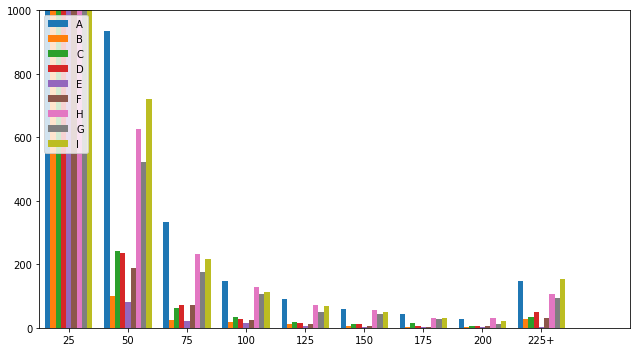

In [24]:
display(HTML("<p style='font-weight: bold; color:black; font-size:200%; font-family:verdana;text-align:center;'> " + 
             "<b>Distribution lem frequences with ylim=1000</b>" + 
             "</p>"))
def plot_histogram_01():
    np.random.seed(1)
    values_A = data['Freq_A']
    values_B = data['Freq_B']
    values_C = data['Freq_C']
    values_D = data['Freq_D']
    values_E = data['Freq_E']
    values_F = data['Freq_F']
    values_H = data['Freq_H']
    values_G = data['Freq_G']
    values_I = data['Freq_I']

    bins = np.arange(0,250,25)

    fig, ax = plt.subplots(figsize=(9, 5))
    _, bins, patches = plt.hist([np.clip(values_A, bins[0], bins[-1]),
                                 np.clip(values_B, bins[0], bins[-1]),
                                 np.clip(values_C, bins[0], bins[-1]),
                                 np.clip(values_D, bins[0], bins[-1]),
                                np.clip(values_E, bins[0], bins[-1]),
                                 np.clip(values_F, bins[0], bins[-1]),
                                 np.clip(values_H, bins[0], bins[-1]),
                                np.clip(values_G, bins[0], bins[-1]),
                                 np.clip(values_I, bins[0], bins[-1])],
                                # normed=1,  # normed is deprecated; replace with density
                                density=False,
                                bins=bins, label=['A', 'B','C', 'D','E', 'F', 'H', 'G', 'I'])

    xlabels = bins[1:].astype(str)
    xlabels[-1] += '+'

    N_labels = len(xlabels)
    plt.xlim([0, 250])
    plt.ylim([0, 1000])
    plt.xticks(25 * np.arange(N_labels) + 12.5)
    ax.set_xticklabels(xlabels)

    #plt.yticks([])
    plt.title('')
    plt.setp(patches, linewidth=0)
    plt.legend(loc='upper left')

    fig.tight_layout()
plot_histogram_01()